In [23]:
import re
import numpy as np
import pandas as pd

# NLTK
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.stem.porter import *

# Gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Spacy for lemmatization
import spacy

# Plotting
import matplotlib.pyplot as plt
from numpy.random import normal
%matplotlib inline
from wordcloud import WordCloud

# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [16]:
# Import dataset
data = pd.read_csv('Data/top_50.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23264 entries, 0 to 23263
Data columns (total 3 columns):
listing_id     23264 non-null float64
review         23264 non-null object
review_date    23264 non-null object
dtypes: float64(1), object(2)
memory usage: 545.3+ KB


In [17]:
data.head()

,listing_id,review,review_date
0,15440.0,exquisite . private and . a long a charming ve...,2010-01-14
1,15440.0,this is a real gem . pristine spotlessly clean...,2010-01-18
2,15440.0,absolutely wonderful place with wonderful host...,2010-02-14
3,15440.0,this charming cottage is a real find and the h...,2010-02-26
4,15440.0,we enjoyed our stay here . we loved walking do...,2010-03-19


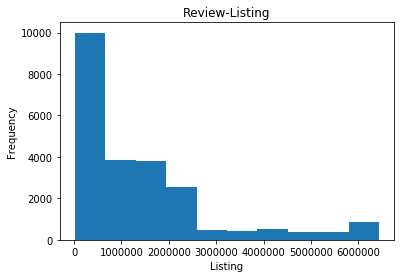

In [19]:
plt.hist(data['listing_id'])
plt.title("Review-Listing")
plt.xlabel("Listing")
plt.ylabel("Frequency")
plt.show()

In [8]:
fdist = nltk.FreqDist(data['review'])
print(fdist.most_common(10))

[('great place ! ', 15), ('great location ! ', 10), ('great place ', 8), ('great place to stay ! ', 7), ('great ! ', 7), ('great stay ! ', 5), ('great place to stay ', 5), ('great location ', 5), ('everything was great ! ', 4), ('great stay ', 4)]


['exquisit', '.', 'privat', '.', 'long', 'charm', 'venic', '.', 'one', 'rare', 'place', 'want', 'keep', 'secret', 'might', 'avail', 'visit', '.', 'real', 'gem', '.', 'pristin', 'spotlessli', 'clean', 'excel', 'featur', 'love', 'warmth', 'small', 'fireplac']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



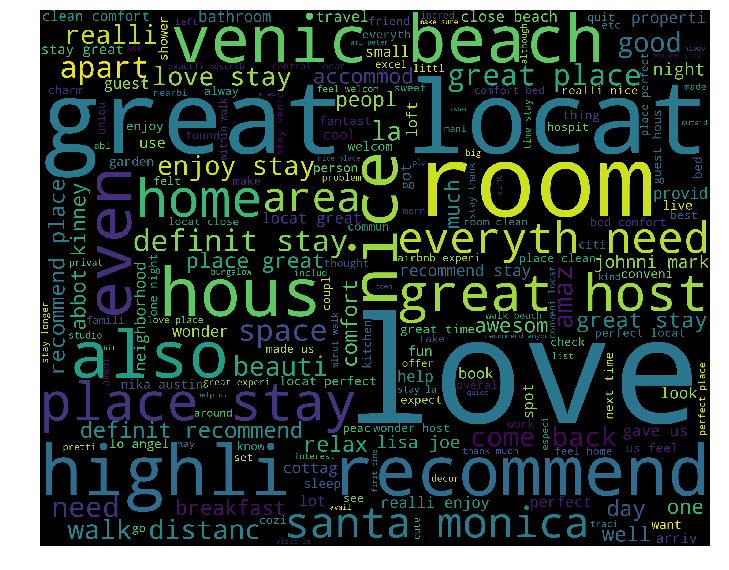

In [29]:
# Read the whole text.
text =""
for review in data['review']:
    text= text + review

# Remove Stopwords
stop_list = stopwords.words('english')
text = text.lower()
text= text.split(" ")

text_stopword_removed=[]
for word in text:
    if word not in stop_list:
        text_stopword_removed.append(word)

stemmer = PorterStemmer()
text_stemmed = [stemmer.stem(w) for w in text_stopword_removed]
print(text_stemmed[0:30])

words = ' '.join(text_stemmed)
print(words)

# Generate a word cloud image
wordcloud = WordCloud(background_color='black',width=2500,height=2000).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

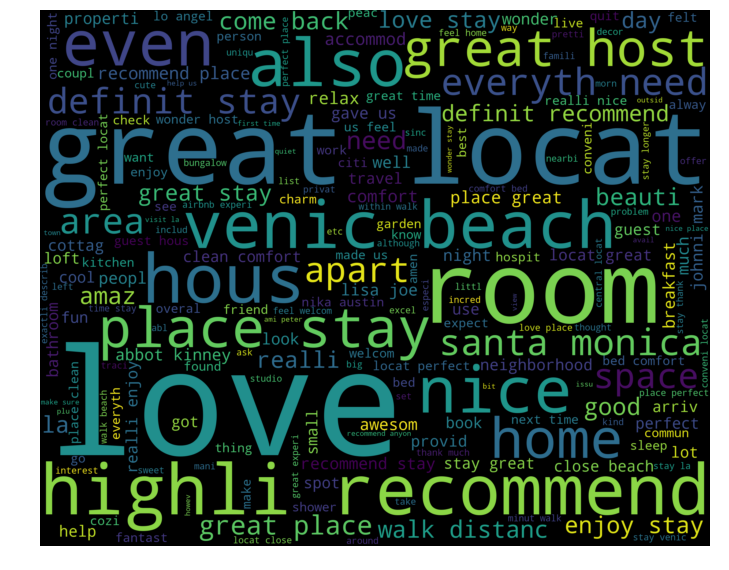

In [30]:
# Creating a bigram model
wordcloud1 = WordCloud(background_color='black',width=2500,height=2000).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()